In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
def split_text(filename):
    chat = open(filename)
    chat_text = chat.read()
    return chat_text.splitlines()

In [3]:
text_list = split_text(os.path.join("data", "ceara_whats_data.txt"))

In [4]:
df_list = []
for i in range(len(text_list)):
    text_df = pd.DataFrame(text_list[i].split(" - ")).T
    
    if len(text_df.columns) == 2:
        text_df.rename(columns={0: "date_time", 1: "text_body"}, inplace=True)
        
        try:
            text_df["date_time"] = pd.to_datetime(text_df["date_time"], format='%d/%m/%Y %H:%M')
            df_list.append(text_df)
        except:
            continue

In [5]:
df = pd.concat(df_list, axis=0).dropna()

df.tail()

,date_time,text_body
0,2022-08-29 09:45:00,+55 11 94345-0558: Crescimento de vagas mais u...
0,2022-08-29 09:56:00,+55 11 99801-7200: AO VIVO: O diretor de Polít...
0,2022-08-29 10:10:00,+55 11 97671-7449: Diogo falando agora
0,2022-08-29 10:32:00,+55 11 99100-5956: https://oglobo.globo.com/bl...
0,2022-08-29 11:27:00,+55 11 99100-5956: *ARKO ALERTA | Núcleo de Bo...


In [7]:
df["date"] = [dtref.strftime("%Y-%m-%d") for dtref in df["date_time"]]

In [8]:
text_body_by_day_df = df.groupby(by=["date"]).count()[["text_body"]]
text_body_by_day_df.rename(columns={"text_body": "number of interactions"}, inplace=True)
text_body_by_day_df["number of interactions avg7"] = text_body_by_day_df["number of interactions"].rolling(window=7).mean()

text_body_by_day_df = text_body_by_day_df.dropna()

In [9]:
text_body_by_day_df.tail()

,number of interactions,number of interactions avg7
date,,
2022-08-25,7,6.285714
2022-08-26,31,9.285714
2022-08-27,6,10.000000
2022-08-28,13,11.571429
2022-08-29,21,14.285714


<AxesSubplot:xlabel='date'>

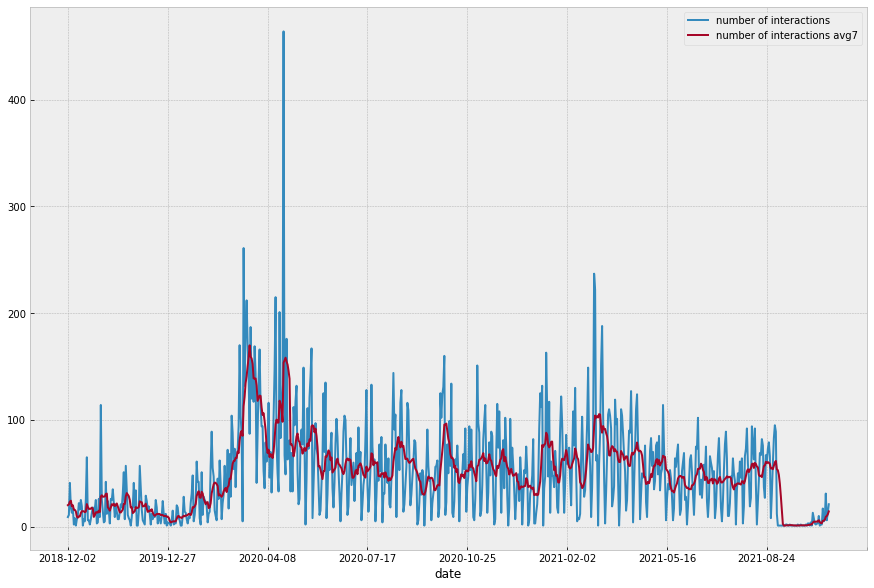

In [10]:
text_body_by_day_df.plot()

In [12]:
text_body_by_day_df.to_csv("whatsapp_data.csv")